In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,99,95)loss10delay50bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

In [16]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,99,95)loss20delay50bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

In [17]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,99,95)loss30delay50bw100 (avg).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

In [18]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,95,90)loss10delay50bw100 (avg).json', 'r') as file:
    json_data_data_3 = json.load(file)

# Convert JSON data to DataFrame
df_data_3 = pd.DataFrame(json_data_data_3)

In [19]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,95,90)loss20delay50bw100 (avg).json', 'r') as file:
    json_data_data_4 = json.load(file)

# Convert JSON data to DataFrame
df_data_4 = pd.DataFrame(json_data_data_4)

In [20]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,95,90)loss30delay50bw100 (avg).json', 'r') as file:
    json_data_data_5 = json.load(file)

# Convert JSON data to DataFrame
df_data_5 = pd.DataFrame(json_data_data_5)

In [21]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,90,85)loss10delay50bw100 (avg).json', 'r') as file:
    json_data_data_6 = json.load(file)

# Convert JSON data to DataFrame
df_data_6 = pd.DataFrame(json_data_data_6)

In [22]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,90,85)loss20delay50bw100 (avg).json', 'r') as file:
    json_data_data_7 = json.load(file)

# Convert JSON data to DataFrame
df_data_7 = pd.DataFrame(json_data_data_7)

In [23]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,90,85)loss30delay50bw100 (avg).json', 'r') as file:
    json_data_data_8 = json.load(file)

# Convert JSON data to DataFrame
df_data_8 = pd.DataFrame(json_data_data_8)

In [30]:
# Extract the first index values for the single metrics
metrics = ['avg_total_frames', 'avg_received_frames', 'avg_rendered_frames', 
           'avg_percentage_received_frames', 'avg_skipped_frames', 'avg_render_time_difference', 
           'avg_render_time_difference_key_frame_preceding', 'avg_render_time_difference_key_frame_consecutive',
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_stall_duration_key_frame_preceding',
           'avg_stall_duration_key_frame_consecutive', 'avg_i_frames', 'avg_rendered_i_frames', 'avg_gop_size_frames', 
           'avg_gop_size_time', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_encoding_time', 'avg_propagation_time', 'avg_decoding_time', 'avg_received_bitrate', 
           'avg_fps']

# Initialize dictionary to store metric values
metric_values = {metric: [] for metric in metrics}

# Extract values for each dataframe
for df in [df_data_2, df_data_5, df_data_8]:
    for metric in metrics:
        metric_values[metric].append(df[metric].iloc[0])

# Metrics Comparison
print("\n=== Metrics Comparison ===")
for metric in metrics:
    values = metric_values[metric]
    print("{}: {:.2f} vs {:.2f} vs {:.2f}".format(
        metric, values[0], values[1], values[2]
    ))


=== Metrics Comparison ===
avg_total_frames: 1799.33 vs 1800.00 vs 1800.33
avg_received_frames: 1531.00 vs 1449.00 vs 1646.00
avg_rendered_frames: 1442.00 vs 1351.67 vs 1607.00
avg_percentage_received_frames: 85.09 vs 80.50 vs 91.43
avg_skipped_frames: 357.33 vs 448.33 vs 193.33
avg_render_time_difference: 41.82 vs 44.35 vs 37.48
avg_render_time_difference_key_frame_preceding: 198.84 vs 228.57 vs 224.34
avg_render_time_difference_key_frame_consecutive: 31.00 vs 35.09 vs 22.28
avg_num_of_stall_events: 435.67 vs 403.67 vs 444.33
avg_stall_duration: 37260.67 vs 39454.00 vs 37180.00
avg_stall_duration_key_frame_preceding: 17057.00 vs 20368.33 vs 8657.67
avg_stall_duration_key_frame_consecutive: 1800.00 vs 2254.67 vs 471.33
avg_i_frames: 103.67 vs 107.33 vs 45.33
avg_rendered_i_frames: 102.67 vs 105.33 vs 45.00
avg_gop_size_frames: 16.55 vs 15.77 vs 40.61
avg_gop_size_time: 0.59 vs 0.56 vs 1.39
avg_total_time: 224.72 vs 245.34 vs 261.82
avg_25th_percentile_total_time: 173.00 vs 184.00 vs 1

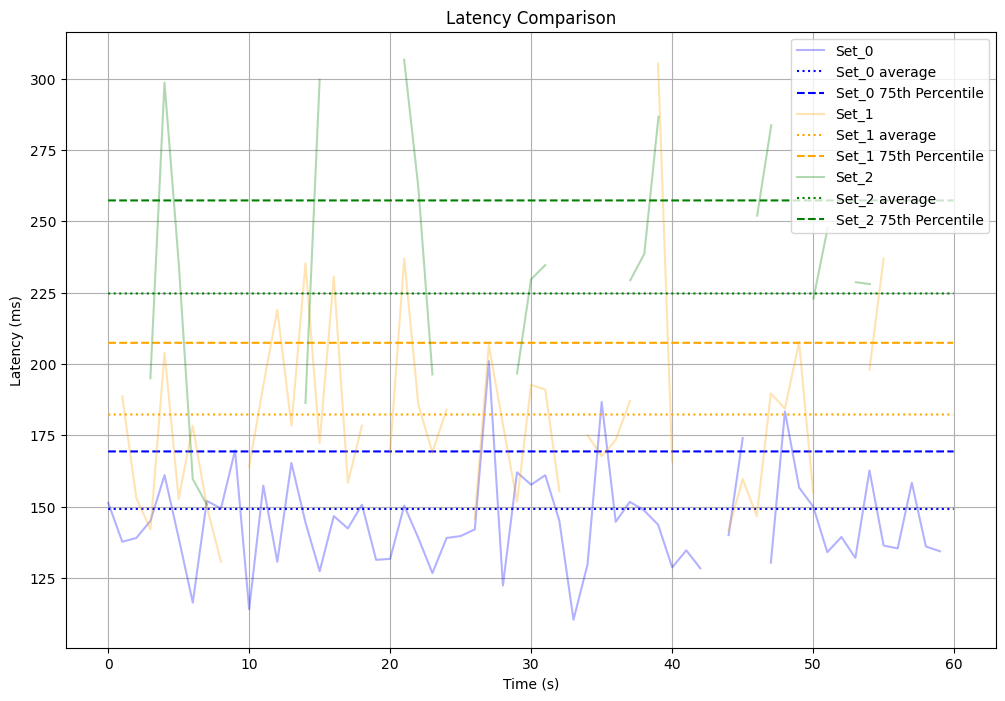

In [31]:
# Extract the continuous data
timestamps_0 = df_data_0['_1_rawVideoTimestamp']
timestamps_1 = df_data_1['_1_rawVideoTimestamp']
timestamps_2 = df_data_2['_1_rawVideoTimestamp']

total_time_0 = df_data_0['_8_totalTime']
total_time_1 = df_data_1['_8_totalTime']
total_time_2 = df_data_2['_8_totalTime']

# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 30  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_2, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='Set_0', color='blue', alpha=0.3)
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_total_time'].iloc[0]] * len(df_data_0), label='Set_0 average', color='blue', linestyle='dotted')
plt.plot(df_data_0['_1_rawVideoTimestamp'], [df_data_0['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_0), label='Set_0 75th Percentile', color='blue', linestyle='dashed')

plt.plot(timestamps_1, smoothed_1, label='Set_1', color='orange', alpha=0.3)
plt.plot(df_data_1['_1_rawVideoTimestamp'], [df_data_1['avg_total_time'].iloc[0]] * len(df_data_1), label='Set_1 average', color='orange', linestyle='dotted')
plt.plot(df_data_1['_1_rawVideoTimestamp'], [df_data_1['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_1), label='Set_1 75th Percentile', color='orange', linestyle='dashed')

plt.plot(timestamps_2, smoothed_2, label='Set_2', color='green', alpha=0.3)
plt.plot(df_data_2['_1_rawVideoTimestamp'], [df_data_2['avg_total_time'].iloc[0]] * len(df_data_2), label='Set_2 average', color='green', linestyle='dotted')
plt.plot(df_data_2['_1_rawVideoTimestamp'], [df_data_2['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_2), label='Set_2 75th Percentile', color='green', linestyle='dashed')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()
